In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
from simple_wpa_simulator.stack_dataloader import load_starfile

# Generating the stack

For generating stack first make sure that you have installed the package (see README). If you used a virtual environment, make sure you have it activated.


## Before running the tutorial

The tutorial provides a config file and a pdb with an atomic model of HSP90

Let's look at the entries of the config file
```json
    "experiment_name": "tutorial",
    "particles_per_model": [10],
    "batch_size": 10,
    "working_dir": "/path/to/working/dir/",
    "output_path": "/path/to/output/",
    "models_fname": "hsp90.pdb",
    "starfile_fname": "tutorial_starfile.star",
    "box_size": 128,
    "pixel_size": 1.5,
    "resolution": 3.0,
    "volt": 300.0,
    "spherical_aberr": 0.2,
    "amp_contrast": 1.0,
    "defocus_u": 1000.0,
    "defocus_v": 1000.0,
    "defocus_ang": [0.0, 180.0],
    "bfactor": 1.0,
    "phaseshift": 0.0,
    "scalefactor": 1.0,
    "seed": 0,
    "mode": "all-atom"
```

The entries of this config file should be pretty self-explanatory. Here are some explanations for some of the less intuitive keys

* `mode` refers to the level of detail of the atomic model. 
    * "all-atom" will use all the atoms (except for hydrogen atoms).
    * "resid" will use the C-alpha atoms as the center. The width of the Gaussian is based on the size of the residue.
    * "cg" takes a coarse-grained model.

* `working_dir` is the directory where you have your atomic models (or a folder that contains a folder containing them).

* `models_fname` is the path to your atomic models RELATIVE to working_dir. You can use "*" to indicate multiple files. For example, if your models are sitting in `working_dir/atomic_models/mymodels_*.pdb`, then you should set this variable as `atomic_models/mymodels_*.pdb`.

* `output_path` is the directory where the outputs of the script will be dumped. These files are a copy of the config file, a copy of the atomic model used for alignment (if multiple models were provided), and the resulting starfile with the .mrcs. If this directory does not exist, it will be created for you.

* For more details and physical units, run `generate_stack --help`

## Generating the stack

Now that you have completed your config file, simply run 

```bash
generate_stack --config config_generator --overwrite 1
```

The default value for `overwrite` is 0, which will make the command raise an error if the directory specified by `output_path` already exists.

Note: this will only work if you have the environment where you installed the package is activated.


# Loading and viewing the generated stack

In [3]:
dir_with_starfile = "/Data/Documents/PhD/year1/Summer23/Projects/simulator_and_writer/tutorial/data/" 

image_stack = load_starfile(
    data_path=dir_with_starfile, name_star_file="tutorial_starfile.star", batch_size=10
)

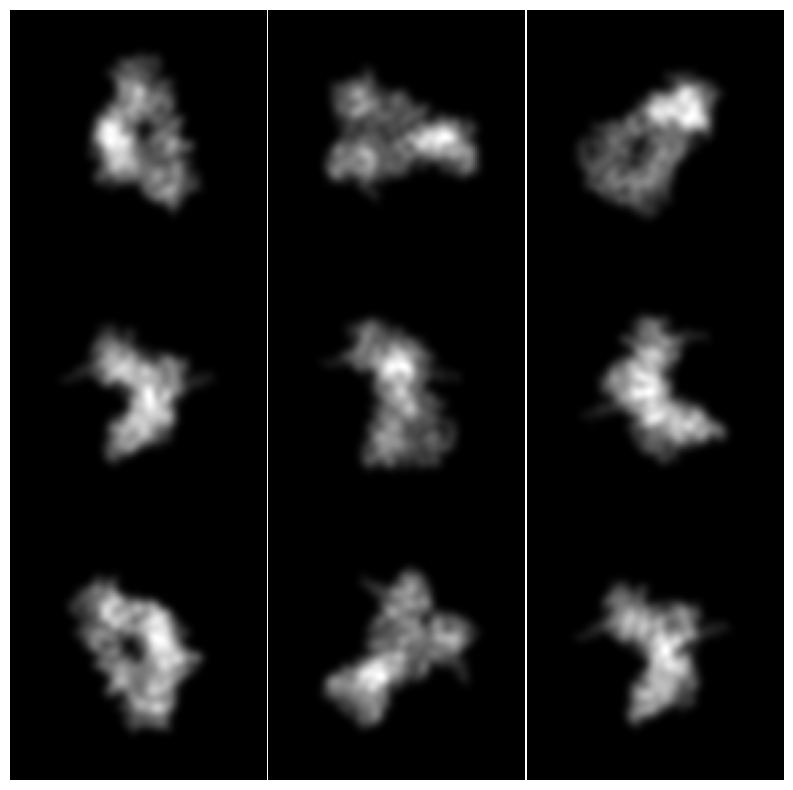

In [4]:
fig, axes = plt.subplots(
    3, 3, figsize=(10, 10), gridspec_kw={"wspace": 0, "hspace": 0}, squeeze=True
)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(image_stack.dataset[i]["proj"].T, origin="lower", cmap="gray")
    ax.axis("off")